In [1]:
import PIL.Image as pi
from PIL import Image
from math import sqrt
import numpy as np

Размер изображения до:(983, 687)
Размер изображения после: (984, 688)


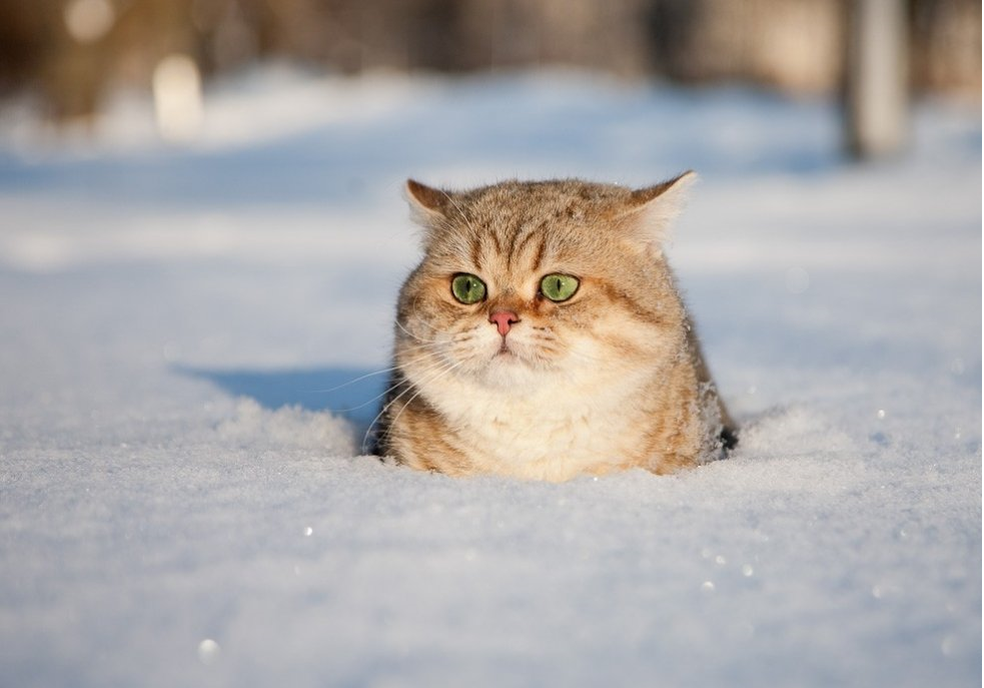

In [2]:
img = Image.open('last.png')
img = img.convert('RGB')
# Делаем размеры кратные 2
width  = img.size[0]
height = img.size[1]
print ('Размер изображения до:' + str(img.size))
# ресайз
if True: 
    if width %  2 == 0: print('width без изменения') 
    else: width += 1
if True: 
    if height % 2 == 0: print('height без изменения')
    else: height += 1
# Округляем размеры исходного изображения
resized_img = img.resize((width, height ), Image.ANTIALIAS)
# Переводим img в array
print('Размер изображения после: ' + str(resized_img.size))
m = np.asarray(resized_img)
# матрица для преобразования 
haar = np.array([[1/2,1/2],[-1/2, 1/2]])
resized_img

In [3]:
# для удобства перемножения на haar сгруппируем элементы строк попарно
def sort_in_pairs(*args):
    row = list(map(list,args[0]))
    pairs = [sorted((row[i],row[i+1]),key=len) for i in range(0,len(row),2)]
    return pairs
a = len(sort_in_pairs(m[0]))
# построчное преобразование
res1 = [np.dot(haar,np.array(sort_in_pairs(m[i]))) for i in range(height)]
# первая матрица (полусумма)
main_m   = np.array([el[0] for el in res1])
# вторая матрица (полуразность)
detail_m = np.array([el[1] for el in res1])

In [4]:
# ARRAY ==> IMG
new_img1 = pi.fromarray(main_m.astype('uint8')) 
new_img2 = pi.fromarray(detail_m.astype('uint8'))

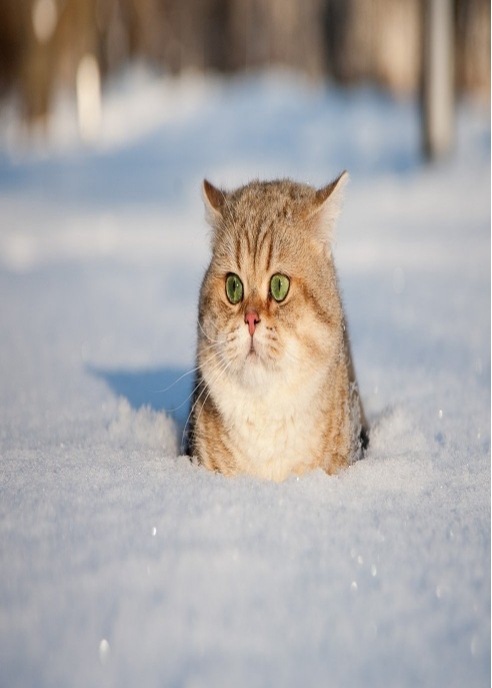

In [5]:
# изображениче из main_m 
new_img1

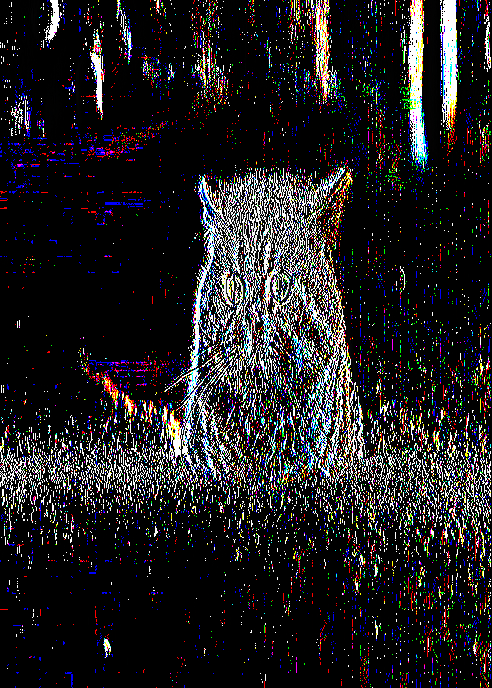

In [6]:
# изображение из detail_m1
new_img2

In [7]:
resized_img = img.resize((width, height ), Image.ANTIALIAS)

width  = new_img1.size[0]
height = new_img1.size[1]

if True:
    if width % 2 == 0: print('width ОК')
    else: width += 1
if True: 
    if height % 2 == 0: print('height ОК')
    else: height += 1    

new_img1 = new_img1.resize((width,height))
new_img2 = new_img2.resize((width,height))

main_m   = np.asarray(new_img1)
detail_m = np.asarray(new_img2)
main_m.shape

width ОК
height ОК


(688, 492, 3)

In [8]:
res2 = [np.dot(haar,np.array(sort_in_pairs(main_m  [:,i]))) for i in range (len(main_m[0]))]
res3 = [np.dot(haar,np.array(sort_in_pairs(detail_m[:,i]))) for i in range (len(main_m[0]))]

In [9]:
main_m1 = np.array([el[0] for el in res2])
main_m2 = np.array([el[1] for el in res2])
detail_m1 = np.array([el[0] for el in res3])
detail_m2 = np.array([el[1] for el in res3])

In [10]:
# 4 изображения из 4 полученных матриц
new_img1 = pi.fromarray(main_m1.astype('uint8'))
new_img2 = pi.fromarray(main_m2.astype('uint8'))
new_img3 = pi.fromarray(detail_m1.astype('uint8'))
new_img4 = pi.fromarray(detail_m2.astype('uint8'))

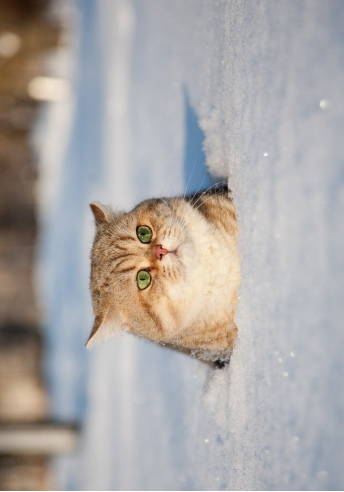

In [11]:
new_img1

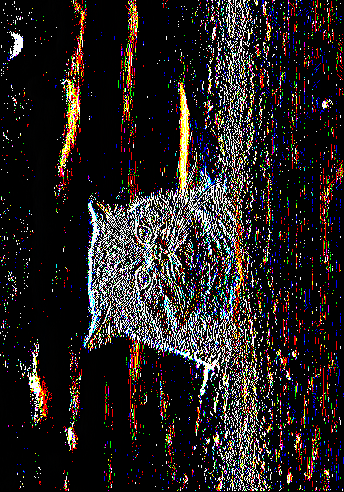

In [12]:
new_img2

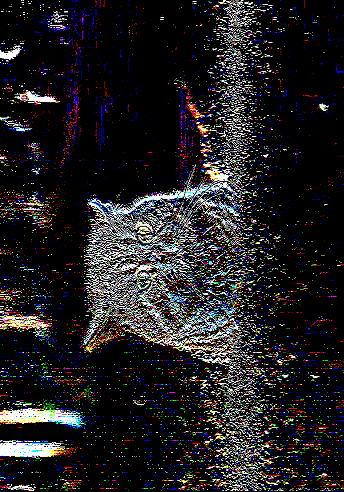

In [13]:
new_img3

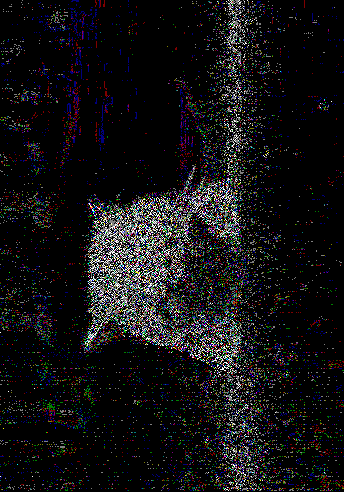

In [14]:
new_img4